In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


In [111]:
csv_file_path = 'extracted_data/extracted_voltage_data_3.6.csv'

df = pd.read_csv(csv_file_path)

df.shape

(437, 52)

In [113]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (371, 50)
X_test shape: (66, 50)
y_train shape: (371, 1)
y_test shape: (66, 1)


In [114]:
y

,Capacity
0,1.782800
1,1.708166
2,1.683461
3,1.649067
4,1.615433
...,...
432,0.983652
433,0.827308
434,0.674738
435,0.562723


In [115]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

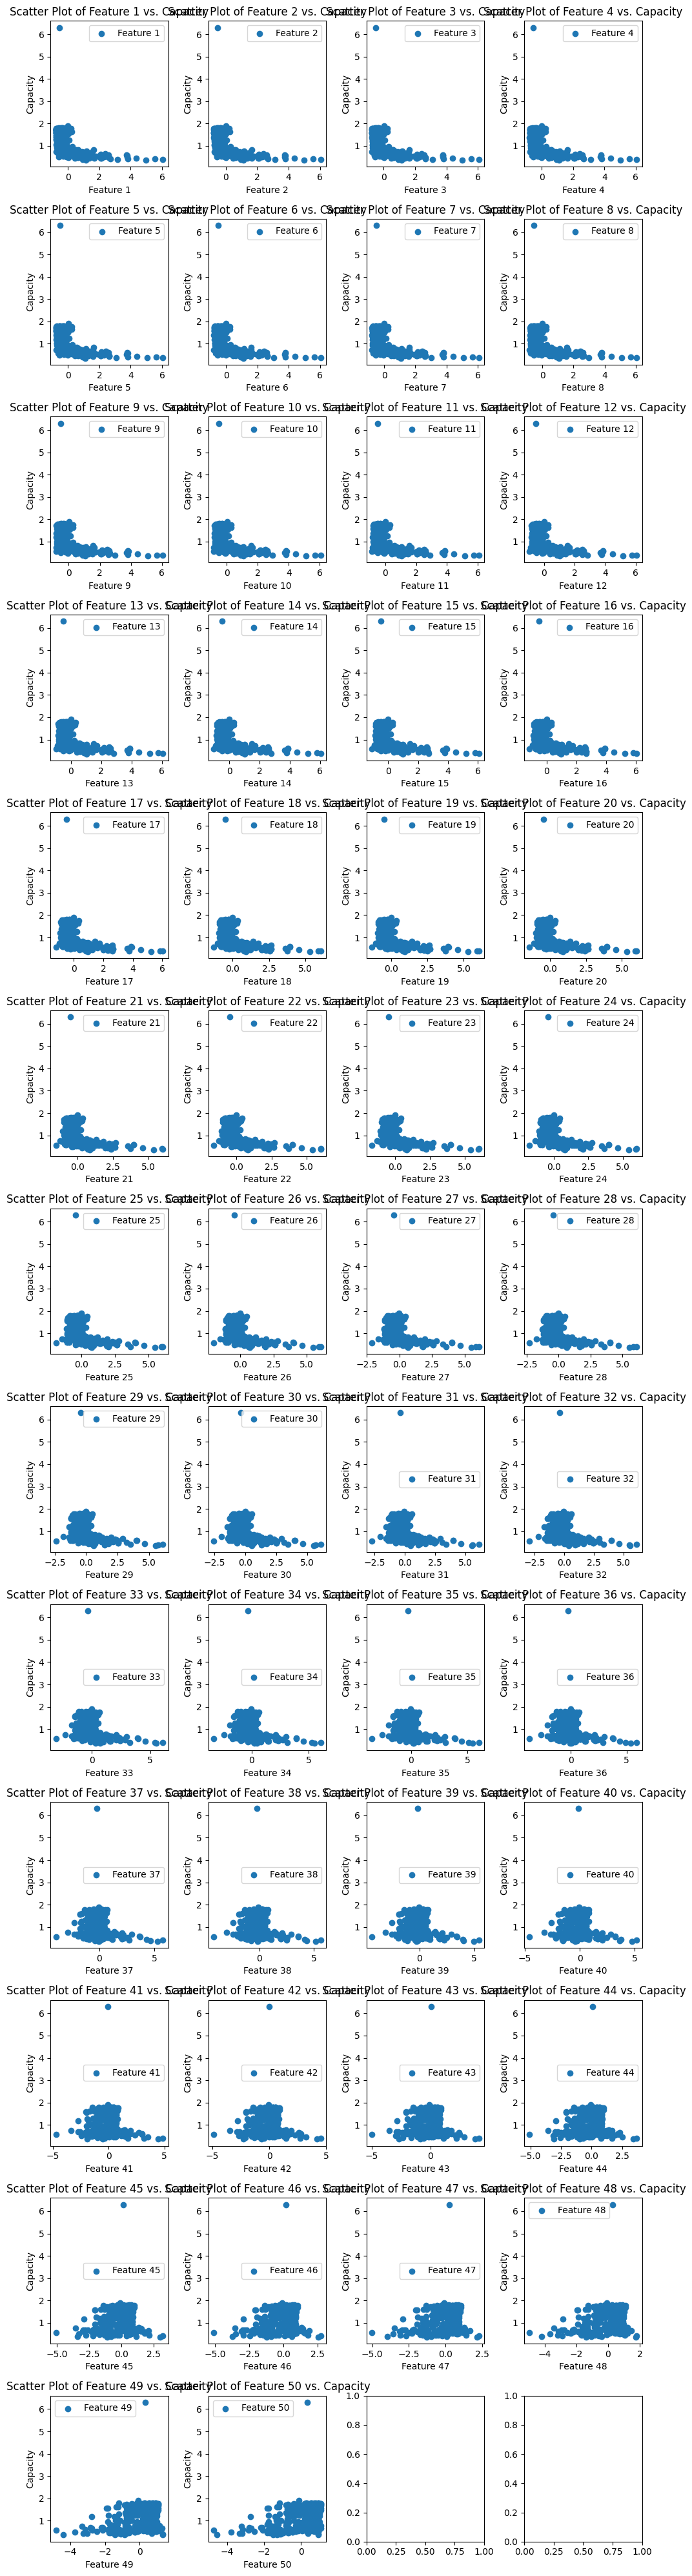

In [116]:
num_features = X_train_scaled.shape[1]

num_rows = (num_features + 2) // 4
num_columns = min(num_features, 4)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10*num_columns))

axes = axes.flatten()

for feature_idx in range(num_features):
    ax = axes[feature_idx]

    ax.scatter(X_train_scaled[:, feature_idx], y_train, label=f'Feature {feature_idx + 1}')
    ax.set_xlabel(f'Feature {feature_idx + 1}')
    ax.set_ylabel('Capacity')
    ax.set_title(f'Scatter Plot of Feature {feature_idx + 1} vs. Capacity')
    ax.legend()

plt.tight_layout()

plt.show()

In [117]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')
])

In [118]:
model.compile(optimizer='adam', loss=tf.compat.v1.losses.mean_squared_error)

In [119]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100
11/11 - 4s - loss: 1.6054 - val_loss: 0.2211 - 4s/epoch - 400ms/step
Epoch 2/100
11/11 - 0s - loss: 0.7483 - val_loss: 0.3045 - 252ms/epoch - 23ms/step
Epoch 3/100
11/11 - 0s - loss: 0.6260 - val_loss: 0.2686 - 148ms/epoch - 13ms/step
Epoch 4/100
11/11 - 0s - loss: 0.6036 - val_loss: 0.2330 - 254ms/epoch - 23ms/step
Epoch 5/100
11/11 - 0s - loss: 0.5559 - val_loss: 0.2496 - 284ms/epoch - 26ms/step
Epoch 6/100
11/11 - 0s - loss: 0.4557 - val_loss: 0.1915 - 340ms/epoch - 31ms/step
Epoch 7/100
11/11 - 0s - loss: 0.5427 - val_loss: 0.2781 - 258ms/epoch - 23ms/step
Epoch 8/100
11/11 - 0s - loss: 0.4598 - val_loss: 0.2120 - 251ms/epoch - 23ms/step
Epoch 9/100
11/11 - 0s - loss: 0.4711 - val_loss: 0.1923 - 250ms/epoch - 23ms/step
Epoch 10/100
11/11 - 0s - loss: 0.4078 - val_loss: 0.1444 - 283ms/epoch - 26ms/step
Epoch 11/100
11/11 - 0s - loss: 0.3965 - val_loss: 0.1832 - 162ms/epoch - 15ms/step
Epoch 12/100
11/11 - 0s - loss: 0.4122 - val_loss: 0.2182 - 290ms/epoch - 26ms/step
Epo

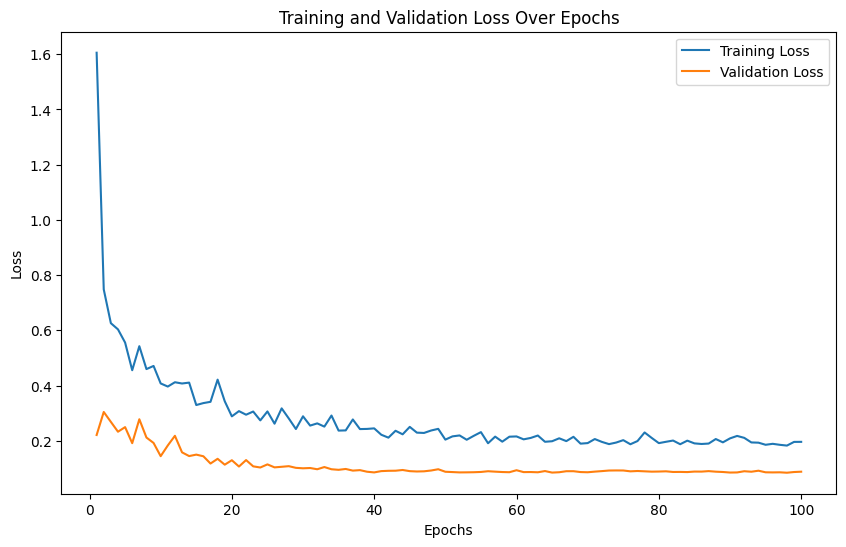

In [120]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [121]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
accuracy = 1 - loss
print(f"Accuracy: {accuracy}")

3/3 [==============================] - 0s 12ms/step - loss: 0.0796
Test Loss: 0.0795501321554184
Accuracy: 0.9204498678445816


In [122]:
# Assuming y_test is a Pandas DataFrame
y_test_values = y_test.to_numpy().flatten()

# Get model predictions
predictions = model.predict(X_test_scaled).flatten()

# Print y_test, predictions, and the difference side by side
for true_value, predicted_value in zip(y_test_values, predictions):
    difference = true_value - predicted_value
    print(f'True Value: {true_value:.2f}  |  Predicted Value: {predicted_value:.2f}  |  Difference: {difference:.2f}')


3/3 [==============================] - 0s 17ms/step
True Value: 0.67  |  Predicted Value: 1.48  |  Difference: -0.81
True Value: 1.72  |  Predicted Value: 1.39  |  Difference: 0.33
True Value: 0.47  |  Predicted Value: 0.45  |  Difference: 0.02
True Value: 0.68  |  Predicted Value: 0.46  |  Difference: 0.22
True Value: 1.76  |  Predicted Value: 1.51  |  Difference: 0.25
True Value: 0.75  |  Predicted Value: 0.62  |  Difference: 0.12
True Value: 0.68  |  Predicted Value: 0.47  |  Difference: 0.21
True Value: 1.63  |  Predicted Value: 1.39  |  Difference: 0.25
True Value: 0.98  |  Predicted Value: 1.12  |  Difference: -0.13
True Value: 1.63  |  Predicted Value: 1.46  |  Difference: 0.17
True Value: 0.68  |  Predicted Value: 0.46  |  Difference: 0.22
True Value: 0.62  |  Predicted Value: 0.46  |  Difference: 0.16
True Value: 1.62  |  Predicted Value: 1.50  |  Difference: 0.13
True Value: 0.80  |  Predicted Value: 0.93  |  Difference: -0.13
True Value: 1.67  |  Predicted Value: 1.44  |  Di

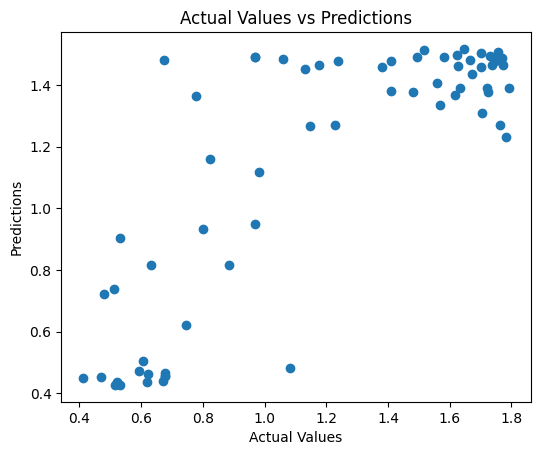

In [123]:
# Plot actual values vs predictions
plt.scatter(y_test_values, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs Predictions')
# plt.xscale(3)


plt.gca().set_aspect('equal', adjustable='box')

plt.show()